In [38]:

#import seaborn as sns

#from sklearn import preprocessing
#from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dff=pd.read_csv('/content/drive/MyDrive/Machine learning/Assignment/Assignment 6/BankNote_Authentication.csv')
print(dff.shape)
print(dff.head())
print(dff.info())
print(dff.isnull().sum()) 
# result of above shows us no any null values.
# feature 'class' is of integer type.

#node class
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.info_gain = info_gain
        
        # for leaf node
        self.value = value
        

#tree class
class DecisionTreeClassifierScratch():
    def __init__(self, min_samples_split=2, max_depth=2):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree ''' 
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        num_samples, num_features = np.shape(X)
        
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["info_gain"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["info_gain"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_info_gain = -float("inf")
        
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
                    # update the best split if needed
                    if curr_info_gain>max_info_gain:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["info_gain"] = curr_info_gain
                        max_info_gain = curr_info_gain
                        
        # return best split
        return best_split
    
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def information_gain(self, parent, l_child, r_child, mode="gini"):
        ''' function to compute information gain '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        if mode=="gini":
            gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
        else:
            gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
        return gain
    
    def entropy(self, y):
        ''' function to compute entropy '''
        
        class_labels = np.unique(y)
        entropy = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            entropy += -p_cls * np.log2(p_cls)
        return entropy
    
    def gini_index(self, y):
        ''' function to compute gini index '''
        
        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            p_cls = len(y[y == cls]) / len(y)
            gini += p_cls**2
        return 1 - gini
        
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        Y = list(Y)
        return max(Y, key=Y.count)
    
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            #print(tree.value)
            a=1
            
        else:
            #print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
            #("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            #print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
    
    def predict(self, X):
        ''' function to predict new dataset '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
    
    def make_prediction(self, x, tree):
        ''' function to predict a single data point '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
        


(1372, 5)
   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None
variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64


In [39]:
#split
X = dff.iloc[:, :-1].values
Y = dff.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=41)

#fitting
classifier = DecisionTreeClassifierScratch(min_samples_split=3, max_depth=3)

classifier.fit(X_train,Y_train)
classifier.print_tree()



X_0 <= 0.31803 ? 0.23747252893387427
 left:X_1 <= 5.0097 ? 0.14985280479887522
  left:X_2 <= 6.2169 ? 0.008485303884975065
    left:X_0 <= -0.36372 ? 0.0007568527478369683
        left:1.0
        right:1.0
    right:X_1 <= -4.7428 ? 0.2183358064766923
        left:1.0
        right:0.0
  right:X_0 <= -4.1479 ? 0.39624958142649847
    left:X_2 <= 1.0836 ? 0.06243496357960443
        left:1.0
        right:0.0
    right:0.0
 right:X_2 <= -4.3882 ? 0.0722328193670069
  left:X_0 <= 2.3917 ? 0.263671875
    left:1.0
    right:0.0
  right:X_0 <= 1.5904 ? 0.01672320052988102
    left:X_2 <= -2.3 ? 0.1386492526995748
        left:1.0
        right:0.0
    right:X_0 <= 2.031 ? 0.0005207744636315757
        left:0.0
        right:0.0


In [40]:
#from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve
#plot_roc_curve(model, X_test, Y_test)
#plt.title('ROC-AUC\n')
#plt.show()
#testing and metrics
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

Y_pred = classifier.predict(X_test) 
print('Our Model from Scratch---')
accur=accuracy_score(Y_test, Y_pred)
print('Accuracy: ', accur)
recall=recall_score(Y_test, Y_pred)
print('Recall: ', recall)
prec=precision_score(Y_test, Y_pred)
print('Precision: ', prec)
f1Score=f1_score(Y_test, Y_pred)
print('f1 Score: ', f1Score)
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

################ Sklearn DT Classifier ###################
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
yPred = clf.predict(X_test)
#print(predictions[:5])
print('\nSklearn Model---')
accur=accuracy_score(Y_test, yPred)
print('Accuracy: ', accur)
recall=recall_score(Y_test, yPred)
print('Recall: ', recall)
prec=precision_score(Y_test, yPred)
print('Precision: ', prec)
f1Score=f1_score(Y_test, yPred)
print('f1 Score: ', f1Score)


Our Model from Scratch---
Accuracy:  0.9733009708737864
Recall:  0.9481865284974094
Precision:  0.9945652173913043
f1 Score:  0.9708222811671087
[[218   1]
 [ 10 183]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       219
           1       0.99      0.95      0.97       193

    accuracy                           0.97       412
   macro avg       0.98      0.97      0.97       412
weighted avg       0.97      0.97      0.97       412


Sklearn Model---
Accuracy:  0.9878640776699029
Recall:  0.9844559585492227
Precision:  0.9895833333333334
f1 Score:  0.9870129870129869


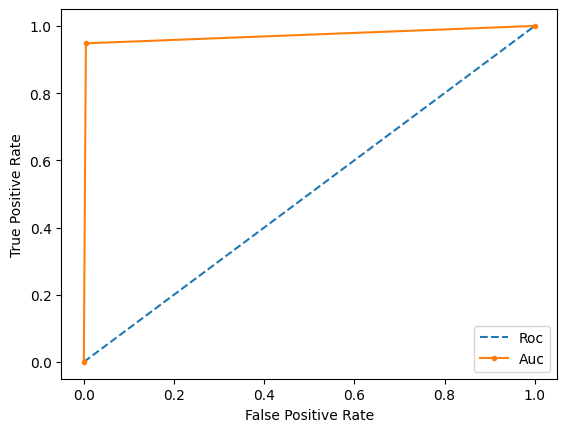

In [41]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
random_probs = [0 for _ in range(len(Y_test))]
ns_fpr, ns_tpr, _ = roc_curve(Y_test, random_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, Y_pred)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Roc')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Auc')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()



